In [1]:
%matplotlib inline
from spacepy import pycdf
from matplotlib import pyplot as plt

In [2]:
swics_file = pycdf.CDF('data/ac_h3_sw2_20130117_v03.cdf')
swics_file_tomorrow = pycdf.CDF('data/ac_h3_sw2_20130118_v03.cdf')

In [3]:
swics_file

<CDF:
C6to5: CDF_REAL4 [12]
C6to5_err: CDF_REAL4 [12]
C6to5_qual: CDF_INT4 [12]
Epoch: CDF_EPOCH [12]
FetoO: CDF_REAL4 [12]
FetoO_err: CDF_REAL4 [12]
FetoO_qual: CDF_INT4 [12]
He_qual: CDF_INT4 [12]
O7to6: CDF_REAL4 [12]
O7to6_err: CDF_REAL4 [12]
O7to6_qual: CDF_INT4 [12]
O8to6: CDF_REAL4 [12]
O8to6_err: CDF_REAL4 [12]
O8to6_qual: CDF_INT4 [12]
Time_PB5: CDF_INT4 [0, 3]
avqFe: CDF_REAL4 [12]
avqFe_err: CDF_REAL4 [12]
avqFe_qual: CDF_INT4 [12]
format_time: CDF_CHAR*2 [3] NRV
label_time: CDF_CHAR*27 [3] NRV
unit_time: CDF_CHAR*4 [3] NRV
vHe2: CDF_REAL4 [12]
vthHe2: CDF_REAL4 [12]
>

In [4]:
# for item in swics_file:
#     print(item,swics_file[item][:])

In [5]:
namelist = ['Epoch','C6to5','O7to6','O8to6','avqFe','FetoO']
for name in namelist:
    exec(f'{name}=swics_file[\'{name}\'][...]')
    exec(f'{name}_tomorrow=swics_file_tomorrow[\'{name}\'][...]')
    if name != 'Epoch':
        exec(f'{name}_err=swics_file[\'{name}_err\'][...]')
        exec(f'{name}_err_tomorrow=swics_file_tomorrow[\'{name}_err\'][...]')
    

In [56]:
whos

Variable              Type           Data/Info
----------------------------------------------
C6to5                 ndarray        12: 12 elems, type `float32`, 48 bytes
C6to5_err             ndarray        12: 12 elems, type `float32`, 48 bytes
C6to5_err_tomorrow    ndarray        12: 12 elems, type `float32`, 48 bytes
C6to5_tomorrow        ndarray        12: 12 elems, type `float32`, 48 bytes
Epoch                 ndarray        12: 12 elems, type `object`, 96 bytes
Epoch_tomorrow        ndarray        12: 12 elems, type `object`, 96 bytes
FetoO                 ndarray        12: 12 elems, type `float32`, 48 bytes
FetoO_err             ndarray        12: 12 elems, type `float32`, 48 bytes
FetoO_err_tomorrow    ndarray        12: 12 elems, type `float32`, 48 bytes
FetoO_tomorrow        ndarray        12: 12 elems, type `float32`, 48 bytes
O7to6                 ndarray        12: 12 elems, type `float32`, 48 bytes
O7to6_err             ndarray        12: 12 elems, type `float32`, 48 by

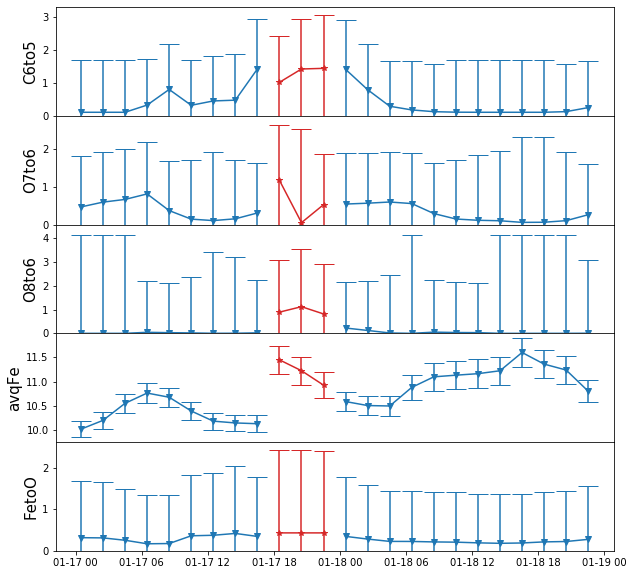

In [62]:
fig, axes = plt.subplots(5,figsize=(10,10))
START = -3
plt.subplots_adjust(hspace=0)

for i in range(5):
    name = namelist[1+i]
    ax = axes[i]
    exec(f'ax.plot(Epoch[:START],{name}[:START],'+r"'v',color='tab:blue')")
    exec(fr"ax.errorbar(Epoch[:START],{name}[:START],{name}_err[:START],fmt='-',capsize=10,color='tab:blue')")
    exec(f"ax.plot(Epoch_tomorrow,{name}_tomorrow,"+r"'v',color='tab:blue')")
    exec(fr"ax.errorbar(Epoch_tomorrow,{name}_tomorrow,{name}_err_tomorrow,fmt='-',capsize=10,color='tab:blue')")
    exec(f'ax.plot(Epoch[START:],{name}[START:],'+r"'*',color='tab:red')")
    exec(fr"ax.errorbar(Epoch[START:],{name}[START:],{name}_err[START:],fmt='-',capsize=10,color='tab:red')")
    exec(fr"ax.set_ylabel('{name}',fontsize=15)")
    if i != 3:
        ax.set_ylim(bottom=0)
    if i != 4:
        ax.set_xticks([])

_ = 0;